# Assignment 8 : Clustering Analysis

## Understanding and Implementing K-Means, Hierarchial, and DBSCAN Algorithms

## Objective

To perform different clustering techniques ( Hierarchial clustering,KMeans clustering,DBSCAN) on the given data and to classify the data in to similar groups

## Dataset Analysis
The given dataset is the description for East-West Airlines, which is analyzing customer data to identify segments based on flying patterns,earnings and use of frequent flyer rewards, and credi card usage.
- **ID#:** Unique identifier for each customer.
- **Balance:** The number of miles eligible for award travel.
- **Qual_miles**: Miles counted as qualifying for Topflight status.
- **cc1_miles:** Miles earned with frequent flyer credit card in the past 12 months.
- **cc2_miles:** Miles earned with Rewards credit card in the past 12 months.
- **cc3_miles:** Miles earned with Small Business credit card in the past 12 months.
- **Bonus_miles:** Miles earned from non-flight bonus transactions in the past 12 months.
- **Bonus_trans:** Number of non-flight bonus transactions in the past 12 months.
- **Flight_miles_12mo:** Number of flight miles in the past 12 months.
- **Flight_trans_12:** Number of flight transactions in the past 12 months.
- **Days_since_enroll:** Number of days since the customer enrolled.
- **Award?:** A dummy variable indicating whether the customer received the last award (1=not null, 0=null).

  

## Task 1 :Data Preprocessing 


In [3]:
# Importing the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
# load the dataset
data = pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")

In [5]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
# all the values are numeric so no need to change it.
# it seems like there are no null values. let's confirm once.

data.isna().sum().sum()

0

In [8]:
# we dont need the id columns so remove the id column
data.drop("ID#",axis=1,inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [10]:
# there is a categorical data in it (award?) so normalize the data rather standardizing it.

# import MinMaxScaler model from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data,columns=data.columns)

In [13]:
scaled_df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.043172,0.012927,0.264879,0.007252,0.003063,0.065020,0.134906,0.014929,0.025917,0.496330,0.370343
std,0.059112,0.069399,0.344230,0.073825,0.048810,0.091590,0.111672,0.045436,0.071569,0.248991,0.482957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010868,0.000000,0.000000,0.000000,0.000000,0.004741,0.034884,0.000000,0.000000,0.280685,0.000000
50%,0.025279,0.000000,0.000000,0.000000,0.000000,0.027195,0.139535,0.000000,0.000000,0.493610,0.000000
75%,0.054201,0.000000,0.500000,0.000000,0.000000,0.090261,0.197674,0.010092,0.018868,0.697914,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


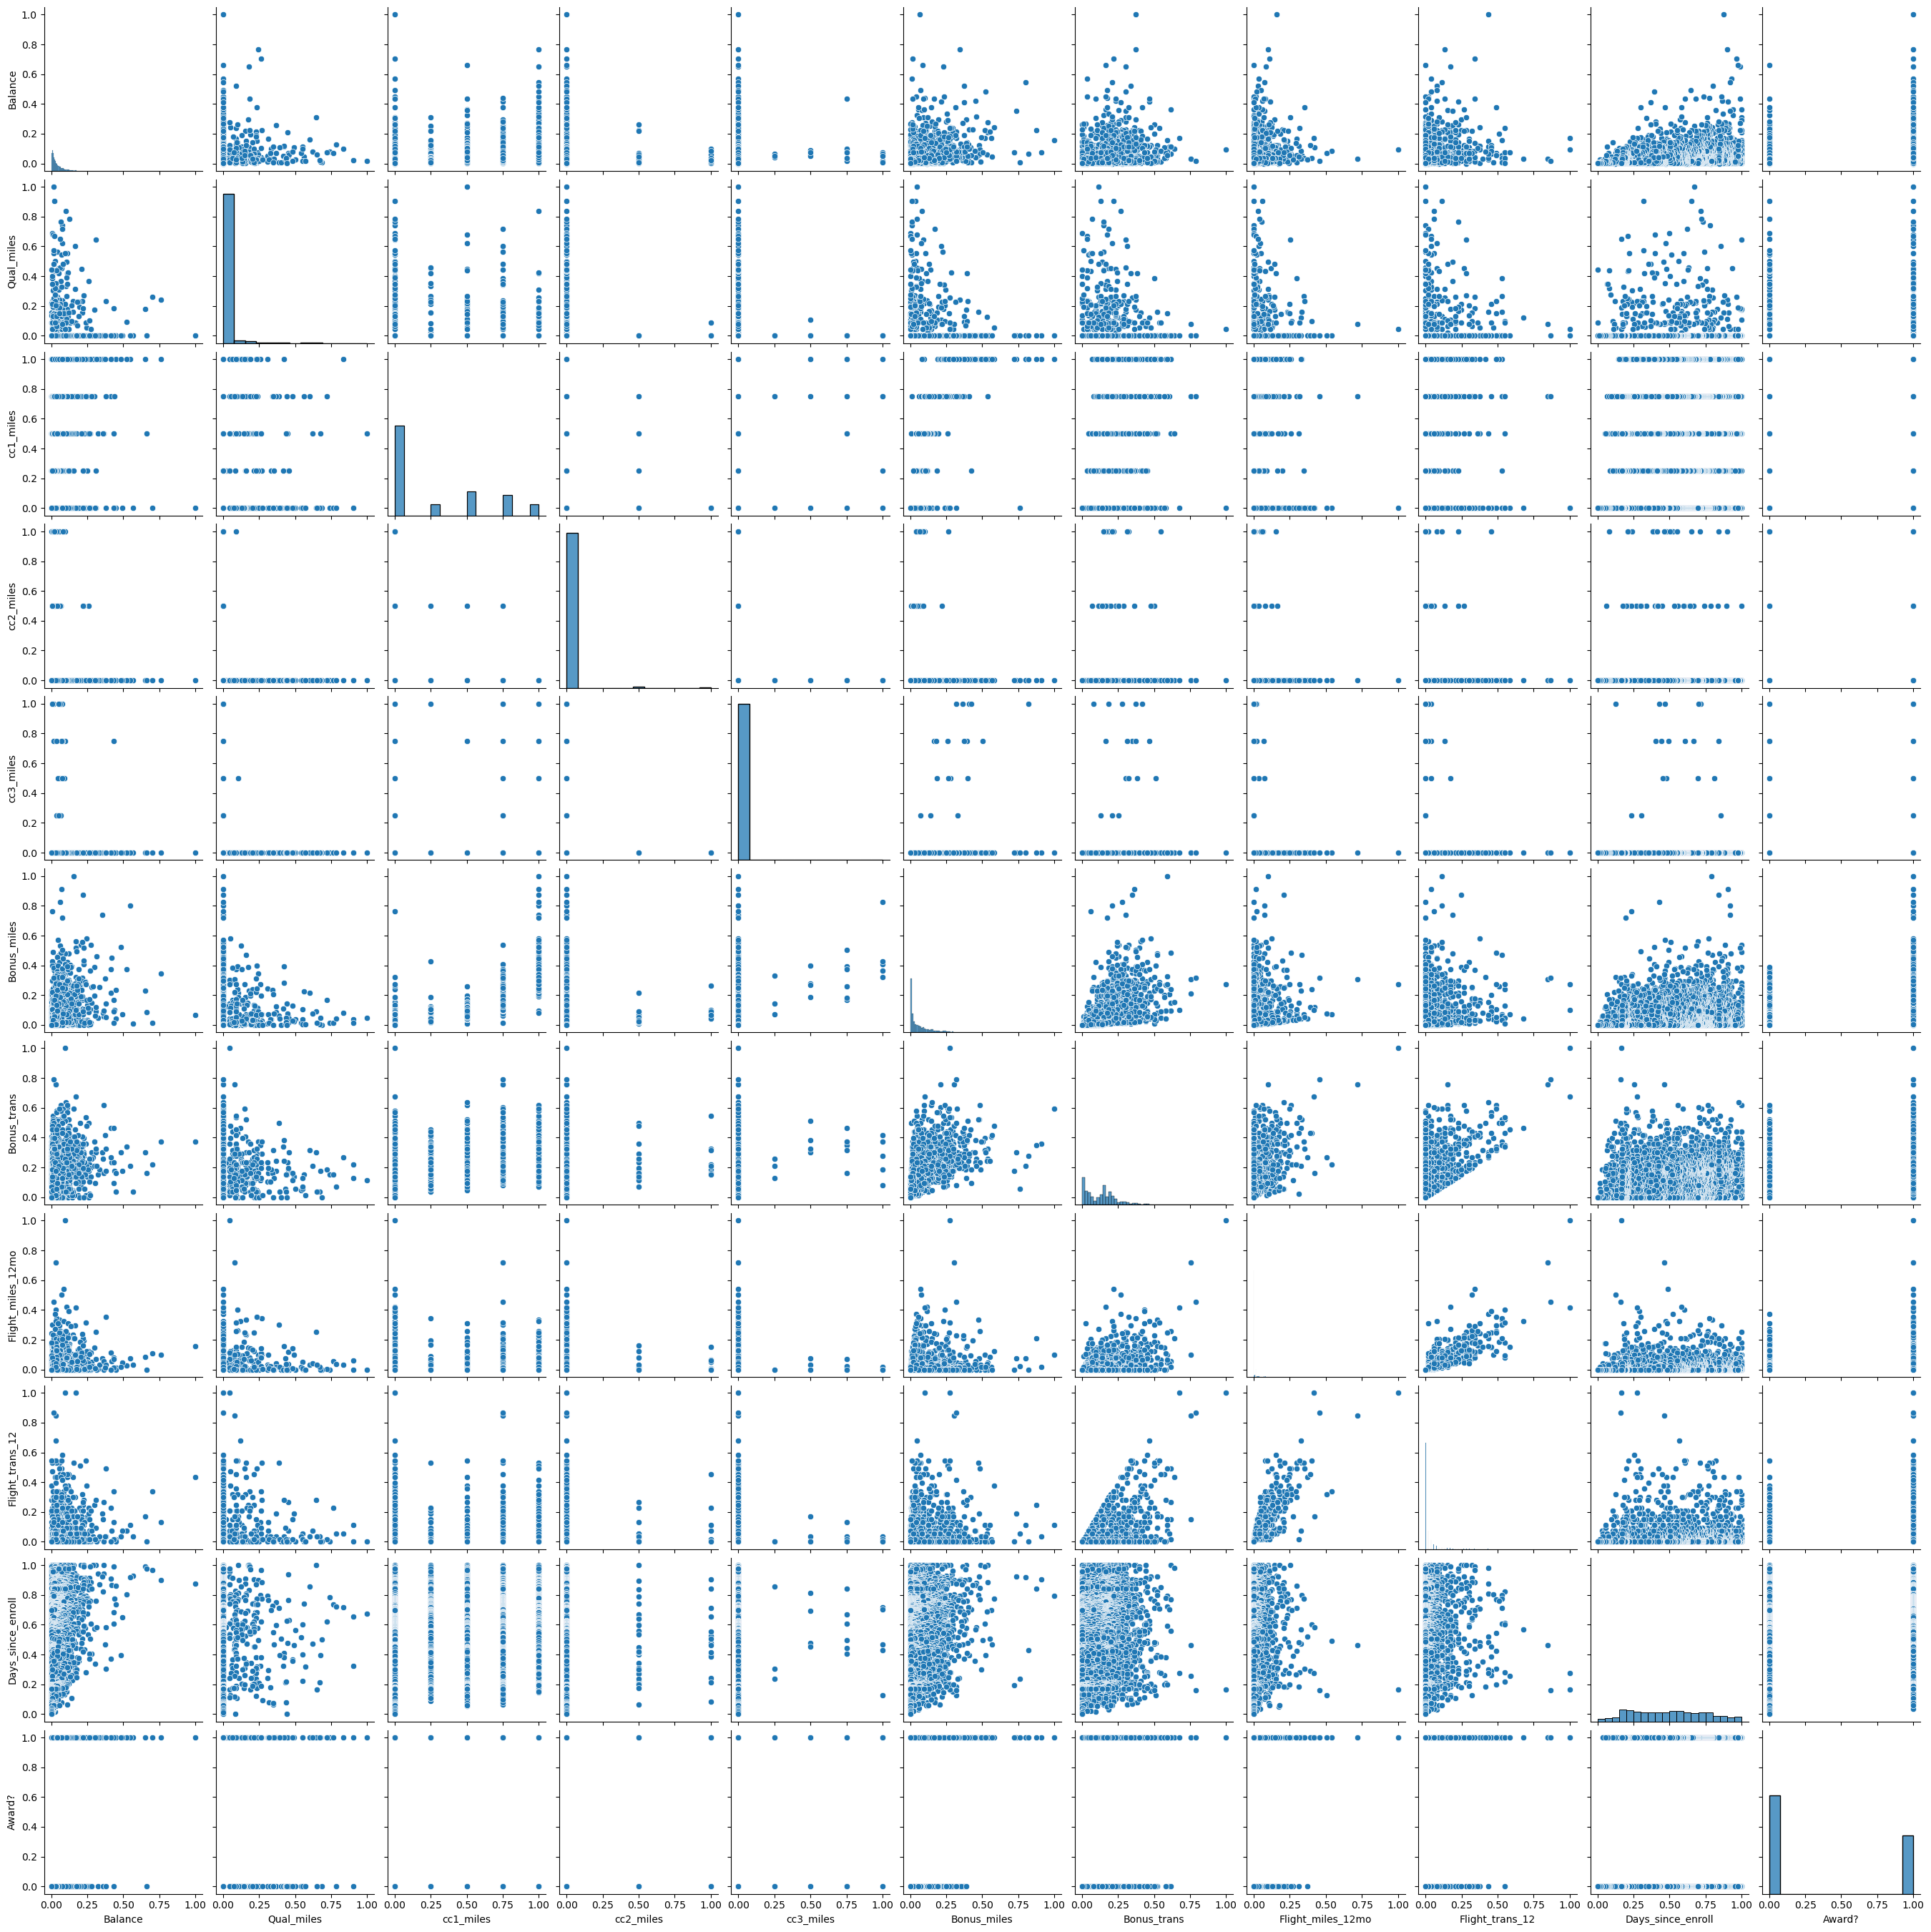

In [14]:
# lets try to analyze the relational plots using pairplot
sns.pairplot(scaled_df)

In [15]:
# correlation 
data.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000,0.188121


 From the correlation matrix we can analyse the following insights:

 - balance is moderately correlated with cc1_miles and Bonus miles and Bonus transactions , so we may assume that most of the balance miles are occured by using the cc1_miles (cards using by cc1 is giving more miles of bonus).
 - cc1 miles are strongly correlated with bonus miles and bonus tranaction.
 - cc2 and cc3 are not much correlated with any of the feature so , by using these credit card they are not getting much benefits.
 - Bonus miles and bonus transactions are highly correlated.
 - Flight_miles_12mo and flight_trans_12 is hightly correlated.

## Task 2 : Implementing Clustering Algorithms

### Clustering : 
clustering is defined as the process of grouping the similar data into groups, like it groups the homogenious data into a group and like that the groups are created by using different techniques like using euclidean distances, or by using the neighbour points.

For Performing clustering different machine learning techniques (algorithms) are used :
 1. Hierarchial clustering (agglomerative clustering)
 2. KMeans Clustering
 3. DBSCAN clustering

## Hierarchial Clustering

In [16]:
# Clustering the data using Hierarchial clustering algorithm
# Import agglomerative clustering model from sklearn.cluster
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [17]:
# Detarmine the distance matix using sch and plot the dendrogram to determine n_cluster.
distance_matrix = sch.linkage(scaled_df,metric="euclidean" ,method="complete")

In [18]:
distance_matrix

array([[3.37000000e+03, 3.87600000e+03, 0.00000000e+00, 2.00000000e+00],
       [3.70400000e+03, 3.72900000e+03, 2.99211023e-04, 2.00000000e+00],
       [2.21500000e+03, 2.22000000e+03, 3.07899725e-04, 2.00000000e+00],
       ...,
       [7.98800000e+03, 7.99100000e+03, 1.96828291e+00, 1.46900000e+03],
       [7.99300000e+03, 7.99400000e+03, 2.18401946e+00, 3.99500000e+03],
       [7.96900000e+03, 7.99500000e+03, 2.30780192e+00, 3.99900000e+03]])

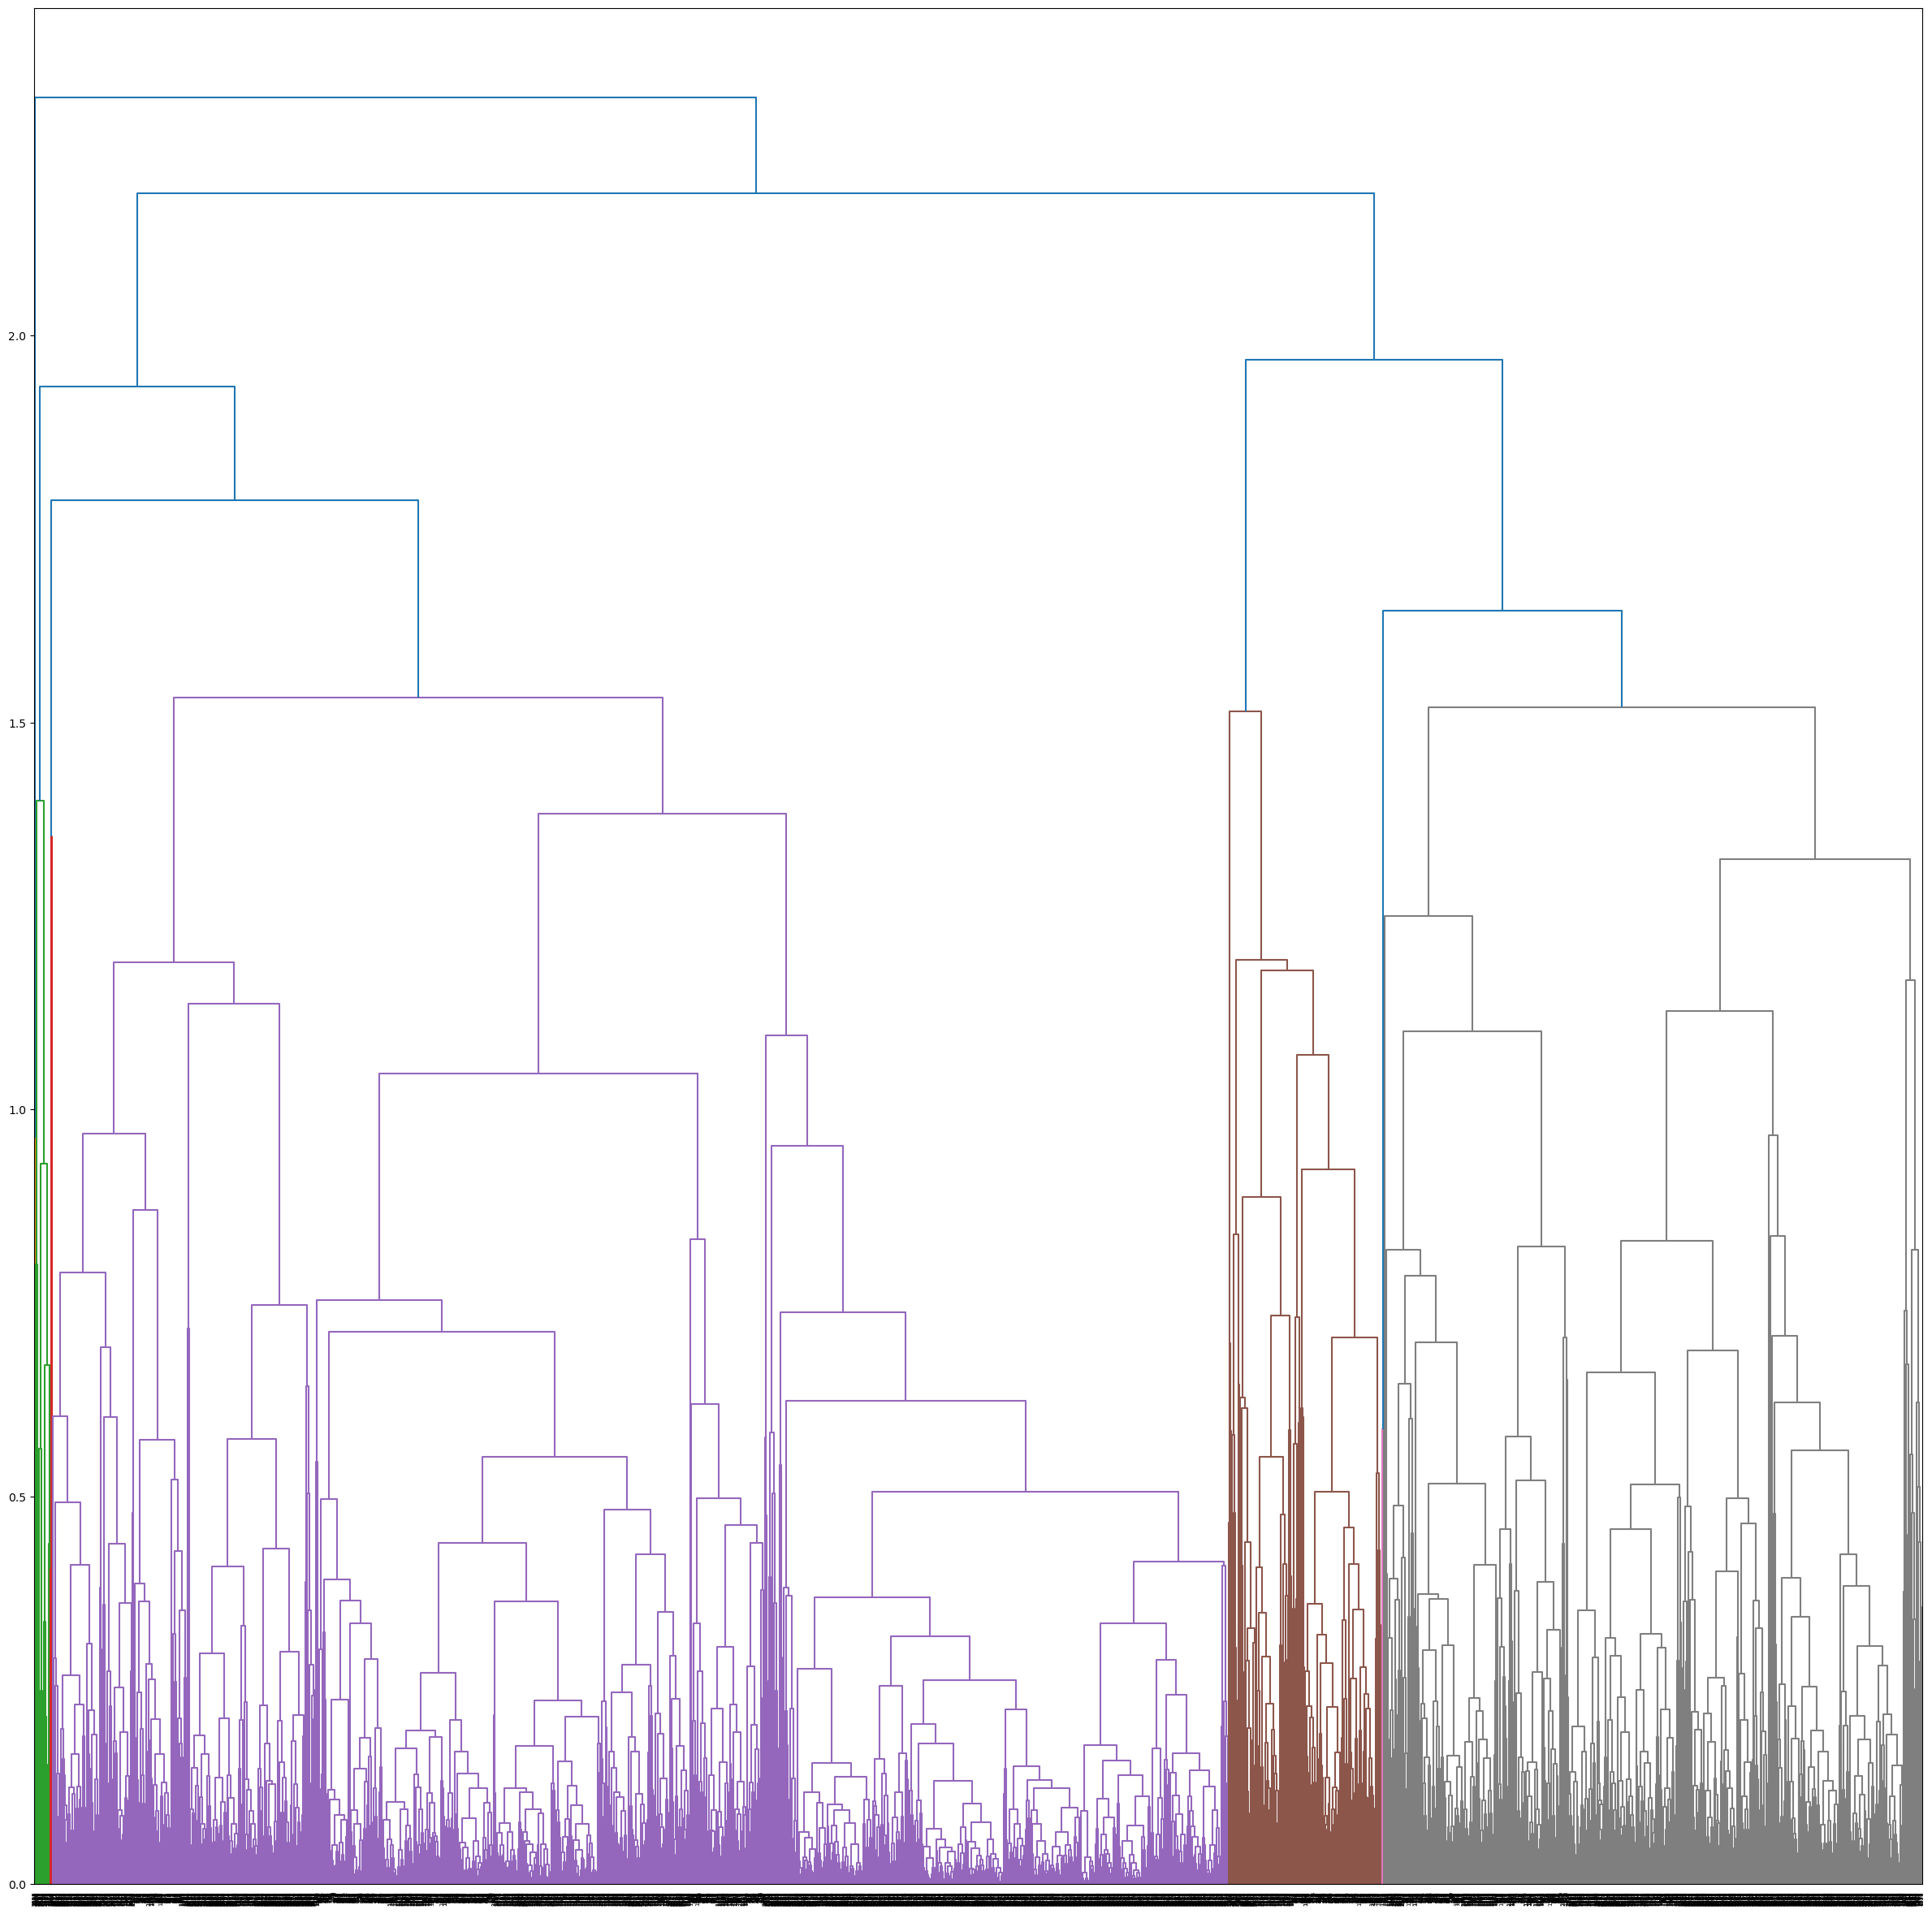

In [19]:
plt.figure(figsize=(30,30))
dendrogram = sch.dendrogram(distance_matrix)


Hence, size of the data is large (4000)records so we can't visualize the dendrogram clearly so lets build the clustering by using different n_clusters and check the silhouette score then take the best one.

In [20]:
# To get the silhoutte score forth the hierarchial clustering.
from sklearn.metrics import silhouette_score


In [21]:
n = list(range(2,10))
score =[]

for i in n:
    HC = AgglomerativeClustering(n_clusters=i, metric="euclidean",linkage="complete")
    HC.fit(scaled_df)
    score.append(silhouette_score(scaled_df,HC.labels_))
    

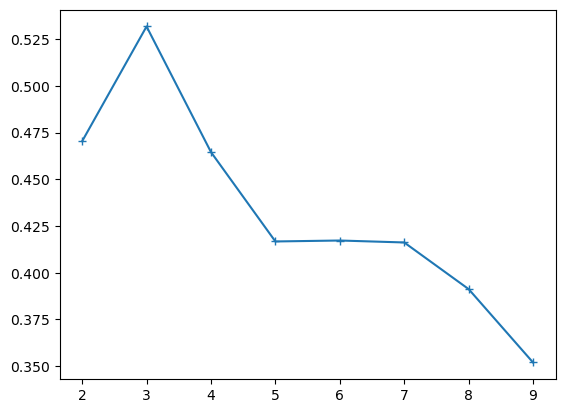

In [22]:
plt.plot(n,score,marker="+")

In [23]:
score[1] # score for 3_clusters.

0.5318787367232326

In [24]:
# hence we got highest silhouette score (0.53) with n-clusters 3 so lets form the clusters with n-clusters 3

HC = AgglomerativeClustering(n_clusters =3, metric = "euclidean",linkage="complete")
HC.fit(scaled_df)
silhouette_score(scaled_df,HC.labels_)

0.5318787367232326

In [25]:
# lets try to create the distance with different linkage methods.
linkages = ["complete","single","average","ward"]
distances=[]

for linkage in linkages:
    distance = sch.linkage(scaled_df,metric="euclidean",method=linkage)
    distances.append(distance)
    

In [26]:
distances[0]

array([[3.37000000e+03, 3.87600000e+03, 0.00000000e+00, 2.00000000e+00],
       [3.70400000e+03, 3.72900000e+03, 2.99211023e-04, 2.00000000e+00],
       [2.21500000e+03, 2.22000000e+03, 3.07899725e-04, 2.00000000e+00],
       ...,
       [7.98800000e+03, 7.99100000e+03, 1.96828291e+00, 1.46900000e+03],
       [7.99300000e+03, 7.99400000e+03, 2.18401946e+00, 3.99500000e+03],
       [7.96900000e+03, 7.99500000e+03, 2.30780192e+00, 3.99900000e+03]])

In [27]:
# lets find the silhouette score for different linkages and different clusterings.
scores={}
n = [i for i in range(2,10)]
for link in linkages:
    list1=[]
    for cluster in n:
        HC = AgglomerativeClustering(n_clusters=cluster,metric="euclidean",linkage=link)
        HC.fit(scaled_df)
        score = silhouette_score(scaled_df,HC.labels_)
        list1.append(np.round(score,3))
    scores[link]=list1
print(scores)    

        

{'complete': [0.47, 0.532, 0.465, 0.417, 0.417, 0.416, 0.391, 0.352], 'single': [0.536, 0.535, 0.481, 0.48, 0.433, 0.431, 0.391, 0.391], 'average': [0.47, 0.396, 0.529, 0.508, 0.487, 0.439, 0.409, 0.401], 'ward': [0.536, 0.436, 0.425, 0.376, 0.334, 0.329, 0.313, 0.326]}


In [28]:
max=0
for i in scores.keys():
    for j in scores[i]:
        if j>max:
            max=j
            
        

In [29]:
max

0.536

In [30]:
# so the maximum silhouette score is 0.536 and it is obtained by using single and 2 clusters.
# create the clusters.
HC = AgglomerativeClustering(n_clusters=2, metric = "euclidean" , linkage="single")
HC.fit(scaled_df)
silhouette_score(scaled_df,HC.labels_)

0.535930510919477

In [31]:
Hc_cluster = data.copy()

In [32]:
Hc_cluster["label"]=pd.DataFrame(HC.labels_)

In [33]:
Hc_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
 11  label              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [34]:
Hc_cluster.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,label
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [35]:
Hc_cluster.sort_values("label",inplace=True)

In [36]:
Hc_cluster.reset_index(inplace=True)

In [37]:
Hc_cluster.head()

,index,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,label
0,1999,327126,1452,5,1,1,97997,25,350,3,4440,1,0
1,3165,194816,0,1,1,1,20822,25,6647,12,2424,1,0
2,1513,124775,1704,1,1,1,11564,8,700,2,4847,1,0
3,1512,4779,0,1,1,1,600,2,0,0,4926,1,0
4,3167,17863,0,1,1,1,0,0,0,0,2028,1,0


In [38]:
Hc_cluster.drop("index",axis=1,inplace=True)

In [39]:
Hc_cluster.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,label
0,327126,1452,5,1,1,97997,25,350,3,4440,1,0
1,194816,0,1,1,1,20822,25,6647,12,2424,1,0
2,124775,1704,1,1,1,11564,8,700,2,4847,1,0
3,4779,0,1,1,1,600,2,0,0,4926,1,0
4,17863,0,1,1,1,0,0,0,0,2028,1,0


In [40]:
Hc_cluster.groupby("label").mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
label,,,,,,,,,,,
0,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0
1,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0


By using hierarchial clustering we have divided the passengers into two clusters

- 0 group passengers are more frequently travelled in last 12months than the 1 group passengers
- 0 group passengers are using more credit cares bonuses for getting the bonus miles.
- 0 group passengers are staying in the commity more than 4000 days.

## KMeans Clustering

In [41]:
# import kmeans clustering.
from sklearn.cluster import KMeans

# plotting the elbow curve to determine n_clusters.

k = [i for i in range(2,9)]


In [42]:
inertia =[]
for i in k:
    kc = KMeans(n_clusters=i)
    kc.fit(scaled_df)
    inertia.append(kc.inertia_)


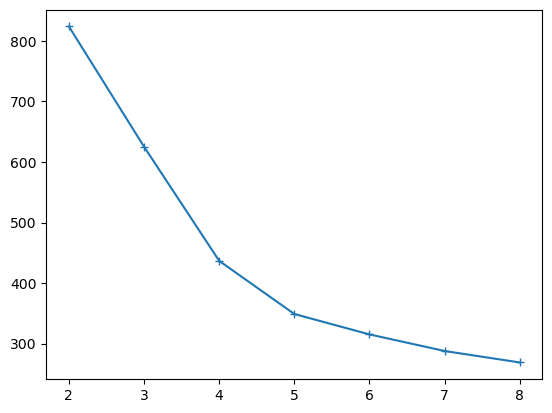

In [43]:
plt.plot(k,inertia,marker="+")

From the curve , there are two elbow values 4,5 lets built the clusters with those values and compare the silhouette scores.


## Evaluation and Performance Metrics

In [ ]:
# kc_4 = KMeans(n_clusters=4)
kc_4.fit(scaled_df)
silhouette_score(scaled_df,kc_4.labels_)

In [45]:
kc_5 = KMeans(n_clusters = 5)
kc_5.fit(scaled_df)
silhouette_score(scaled_df,kc_5.labels_)

0.4430672072796034

In [46]:
# by comparing the silhouette values of 4 and 5 , n-clusters 4 is giving better clusters than 5.
kc=KMeans(n_clusters=4)
kc.fit(scaled_df)


KMeans(n_clusters=4)

In [63]:
kc_data = data.copy()

In [64]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [65]:
kc_data['label']=pd.DataFrame(kc.labels_)

In [67]:
kc_data.sort_values('label',inplace=True)

In [68]:
kc_data.reset_index(inplace=True)

In [70]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   index              3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
 12  label              3999 non-null   int32
dtypes: int32(1), int64(12)
memory usage: 390.7 KB


In [ ]:
# kc_data.drop("index",axis=1,inplace=True)

## Visualization

<Axes: xlabel='Balance', ylabel='Bonus_miles'>

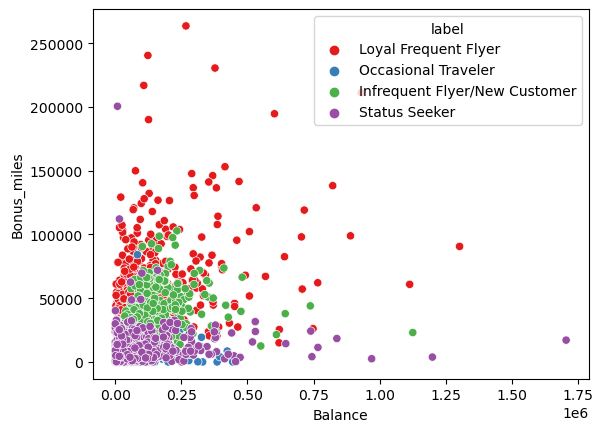

In [162]:
sns.scatterplot(x="Balance",y="Bonus_miles",hue="label",data=kc_data,palette="Set1")

<Axes: xlabel='Flight_miles_12mo', ylabel='Flight_trans_12'>

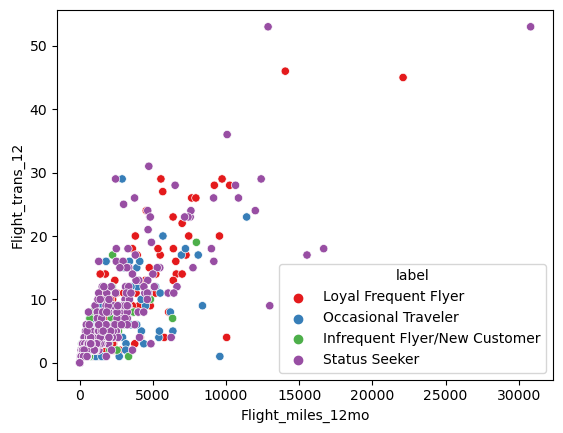

In [169]:

sns.scatterplot(x="Flight_miles_12mo" ,y="Flight_trans_12",hue="label",data=kc_data,palette="Set1")

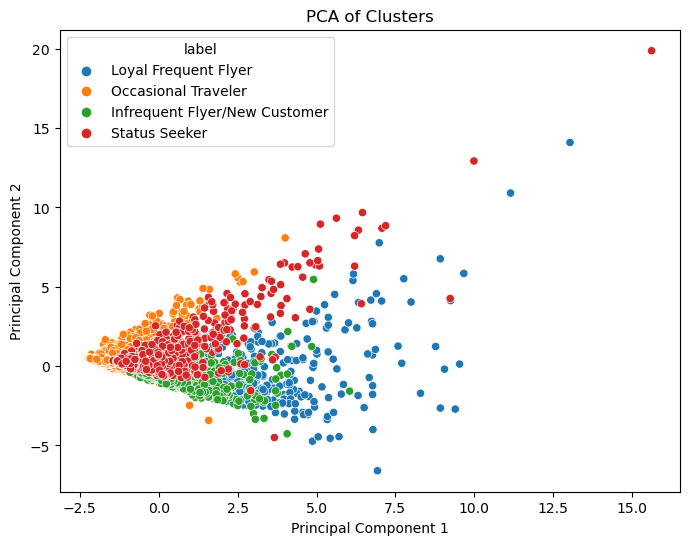

In [181]:
# visualizing the clusters using t-sne plot.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
features = kc_data.columns[:-1]  # Exclude the label column
x = kc_data.loc[:, features].values
x = StandardScaler().fit_transform(x)

# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Concatenate with the label
finalDf = pd.concat([principalDf, kc_data[['label']]], axis = 1)

# Visualize the clusters
plt.figure(figsize = (8,6))
sns.scatterplot(x='principal component 1',y='principal component 2', hue='label', data=finalDf)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Clusters')
plt.show()

In [72]:
kc_data.groupby("label").mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
label,,,,,,,,,,,
0,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0
1,40747.617290,92.345809,1.092778,1.017923,1.004217,3335.152873,6.488666,226.599895,0.658935,3619.111755,0.0
2,118032.061192,73.112721,3.576490,1.001610,1.022544,31282.666667,17.251208,225.352657,0.632850,4436.307568,0.0
3,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0


## Cluster Analysis and Interpretation

By using the KMeans Clustering we have classified the passengers into four groups:

**Cluster 0: 1**

- Lower Balance and Qual_miles compared to other clusters.
- Moderate Bonus_miles and Flight_miles_12mo.
- No recent awards.
- **Interpretation:** These could be customers who have moderate engagement with the airline and some credit card usage but haven't recently earned awards. They might be occasional travelers.

**Cluster 1: 0**

- High Balance and Qual_miles.
- Highest Bonus_miles and Flight_miles_12mo.
- Have earned recent awards.
- **Interpretation:** This group could represent highly active and loyal customers who frequently fly and engage with rewards programs. They could be frequent business travelers or dedicated customers.

**Cluster 2: 3**

- Moderate Balance, but highest Qual_miles.
- Low cc1_miles but moderate use of other credit cards.
- Moderate Bonus_miles and high Flight_miles_12mo.
- Have earned recent awards.
- **Interpretation:** This cluster might represent frequent flyers who focus on qualifying miles, possibly aiming for status, with moderate engagement in non-flight activities.

**Cluster 3: 2**

- Lowest Balance and Qual_miles.
- Low use of credit cards and bonus miles.
- Few flight miles and transactions.
- No recent awards.
- **Interpretation:** This group could represent infrequent flyers or new customers who haven't engaged much with the airline or rewards program yet.

In [73]:
# so label the data according to their category.
map_labels ={
    1:"Occasional Traveler",
    0:"Loyal Frequent Flyer",
    3:"Status Seeker",
    2:"Infrequent Flyer/New Customer"
}

kc_data['label']=kc_data['label'].map(map_labels)

In [74]:
kc_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,label
0,327126,1452,5,1,1,97997,25,350,3,4440,1,Loyal Frequent Flyer
1,24100,0,3,1,1,26674,23,2300,7,3421,1,Loyal Frequent Flyer
2,146232,0,5,1,1,83783,19,375,1,3566,1,Loyal Frequent Flyer
3,28577,0,4,1,1,48564,14,0,0,3586,1,Loyal Frequent Flyer
4,18387,0,4,1,1,40560,19,800,2,3588,1,Loyal Frequent Flyer


# DBSCAN Clustering


In [77]:
# import the dbscan module from sklearn.cluster
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5,min_samples=5)
db.fit(scaled_df)

DBSCAN()

In [79]:
silhouette_score(scaled_df,db.labels_)

0.24338879565909566

In [80]:
len(scaled_df.columns)

11

In [107]:
# Hence the silhouette score is very bad so alter the epsilon and min-samples values.
# in genearal min-samples = n+1
db=DBSCAN(eps=1,min_samples=12)
db.fit(scaled_df)
silhouette_score(scaled_df,db.labels_)

0.535930510919477

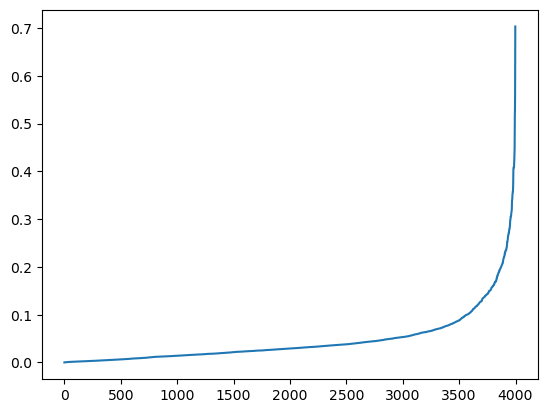

In [84]:
# so for min_samples=12 we are getting better silhouette score.
# finding the best eps value 
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=12)
neighbors_fit = neighbors.fit(scaled_df)
distance,indices = neighbors_fit.kneighbors(scaled_df)
distances = np.sort(distance[:,1],axis=0)
plt.plot(distances)

In [ ]:
# from this graph we there is no clear elbow shape and also even trying with different values
# of eps the silhouette-score is less than the score obtained for eps =1 so go with eps=1
# now change different values for min_samples and verify the sihouette scores.


In [148]:
db=DBSCAN(eps=0.6,min_samples=12)
db.fit(scaled_df)
silhouette_score(scaled_df,db.labels_)

0.5347076976537932

In [149]:
pd.DataFrame(db.labels_).value_counts()

 0    2516
 1    1474
-1       9
Name: count, dtype: int64

In [150]:
# by using the dbscan we can also find the outliers ,in this dataset we have 9 outliers.
# lets assign the values to the dataset and try to interpret the values.
db_data =data.copy()

In [151]:
db_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [152]:
db_data['label']=pd.DataFrame(db.labels_)

In [154]:
db_data.sort_values('label',inplace=True)

In [155]:
db_data.reset_index(inplace=True)

In [156]:
db_data.drop('index',axis=1,inplace=True)

In [157]:
db_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,label
0,84148,0,1,1,5,84148,7,0,0,1054,0,-1
1,1704838,0,1,1,1,17108,32,4823,23,7283,1,-1
2,108081,0,5,1,5,217006,24,0,0,3567,1,-1
3,8557,0,1,1,1,200622,5,622,3,1955,1,-1
4,160114,500,1,1,1,71954,86,30817,53,1373,1,-1


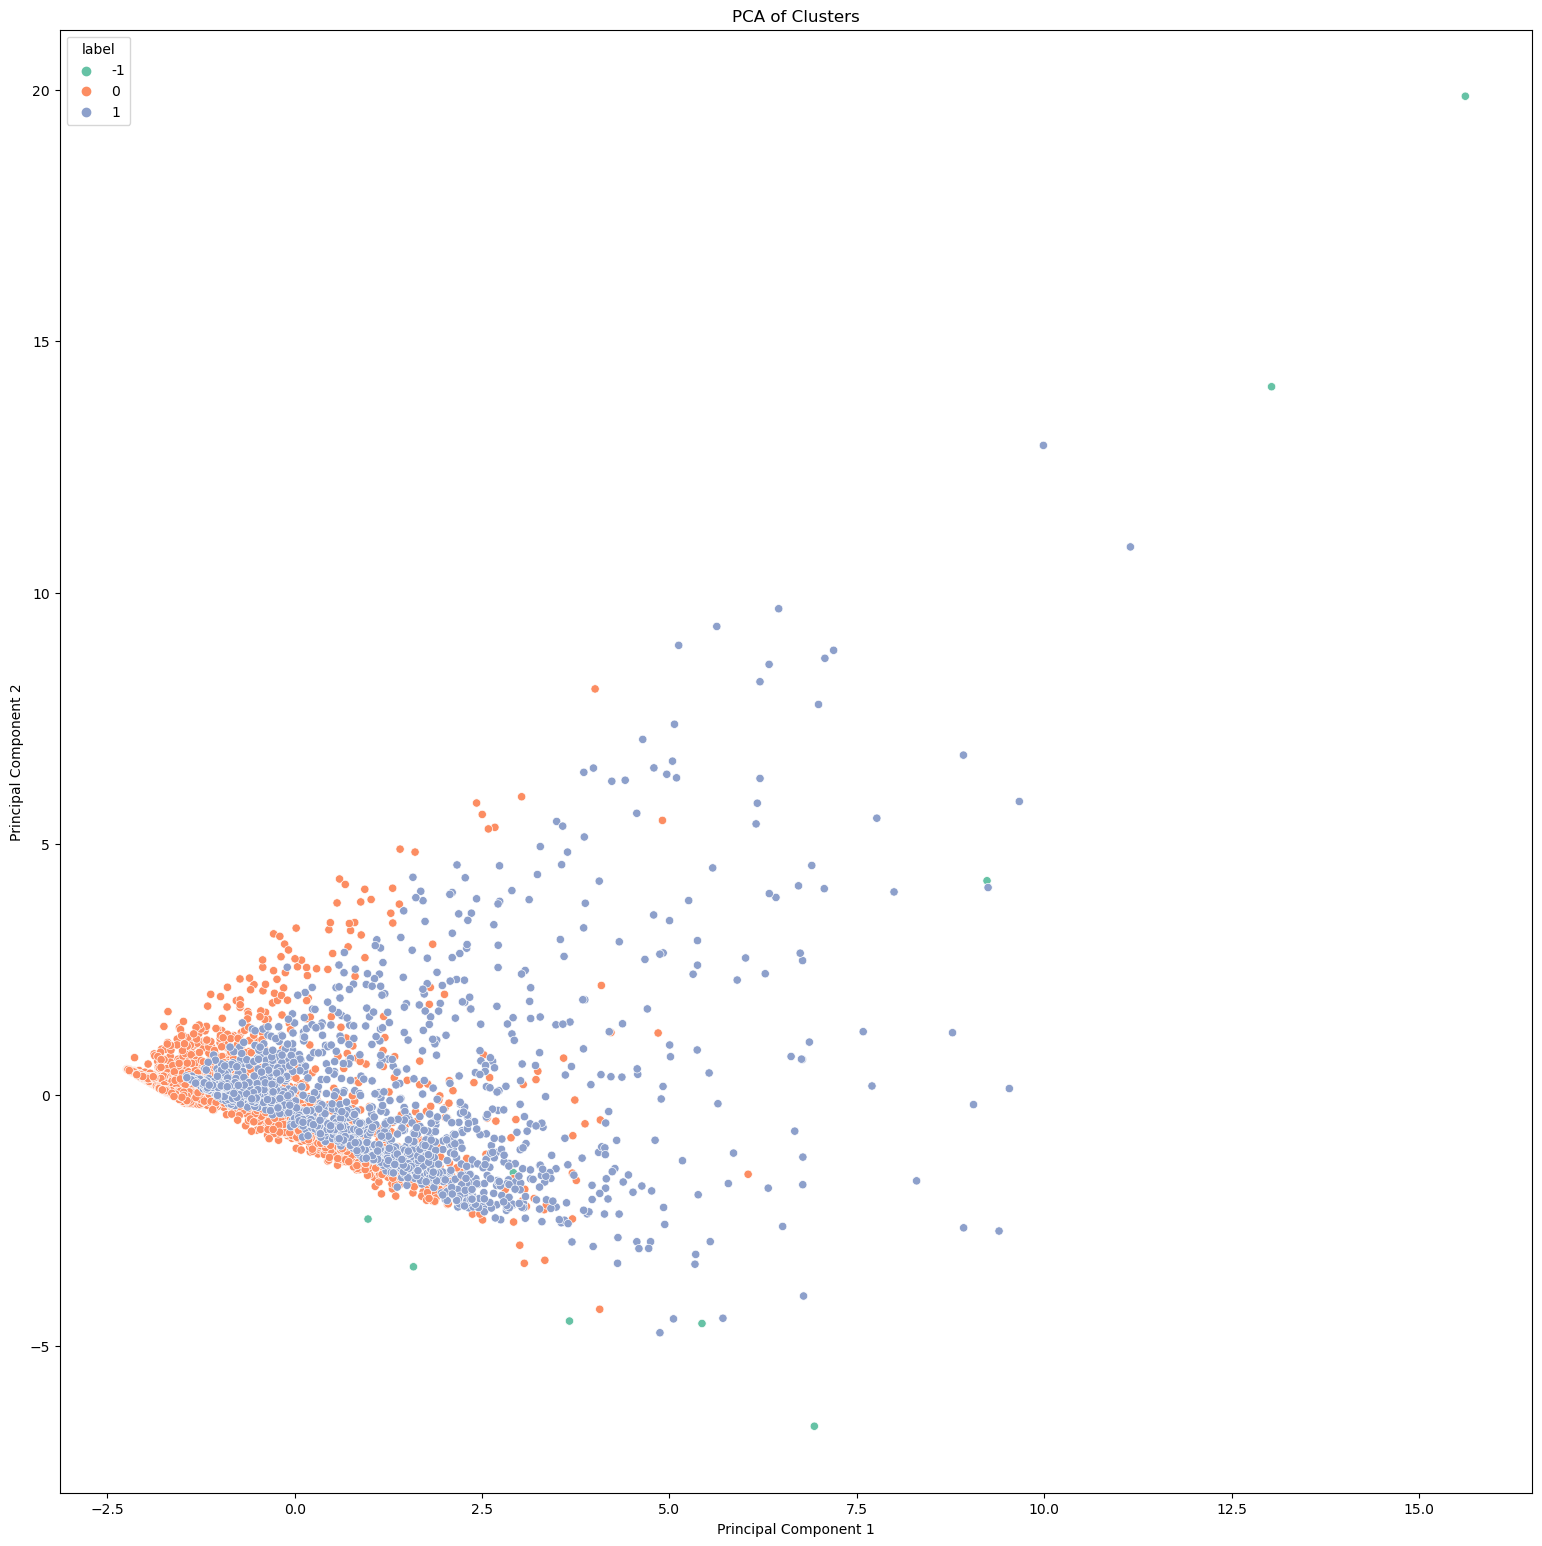

In [184]:
features = kc_data.columns[:-1]  # Exclude the label column
x = db_data.loc[:, features].values
x = StandardScaler().fit_transform(x)

# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Concatenate with the label
finalDf = pd.concat([principalDf, db_data[['label']]], axis = 1)

# Visualize the clusters
plt.figure(figsize = (19,19))
sns.scatterplot(x='principal component 1',y='principal component 2', hue='label', data=finalDf,palette="Set2")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Clusters')
plt.show()

In [161]:
db_data.groupby('label').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
label,,,,,,,,,,,
-1,246878.666667,154.222222,2.222222,1.000000,3.111111,104303.333333,31.666667,6551.333333,14.000000,3800.888889,0.777778
0,59797.503180,87.672099,1.705882,1.013911,1.005962,10183.408585,9.141892,226.472178,0.653021,3821.937202,0.000000
1,96105.348033,240.395522,2.662144,1.015604,1.010176,28495.287653,15.678426,821.571913,2.526459,4626.809362,1.000000


# Cluster -1 (Noise or Outliers)
- **Balance:** 246,878.67 miles – Very high balance, indicating customers with a large number of miles accumulated.
- **Qual_miles:** 154.22 miles – Moderate qualifying miles, potentially not enough for elite status.
- cc1_miles,cc2_miles, cc3_miles: 2.22, 1.00, 3.11 – Mixed usage of credit cards, with higher use of Small Business credit card (cc3_miles).
- **Bonus_miles:** 104,303.33 miles – Very high number of bonus miles, likely from non-flight activities.
- **Bonus_trans:** 31.67 transactions – High number of non-flight bonus transactions.
- **Flight_miles_12mo:** 6,551.33 miles – Very high number of flight miles in the past 12 months.
- **Flight_trans_12:** 14.00 transactions – High number of flight transactions in the past 12 months.
- **Days_since_enroll:** 3,800.89 days – Long-standing customers.
- **Award?:** 0.78 – Some of these customers have recently earned awards.
- **Interpretation:** This cluster likely represents outliers or noise, possibly very high-value customers with unusual or extreme behaviors, such as accumulating a lot of miles and bonuses.
  
## Cluster 0 (Likely Infrequent Flyers)

- **Balance:** 59,797.50 miles – Moderate balance, indicating some accumulated miles but not extremely high.
- **Qual_miles:** 87.67 miles – Low qualifying miles, likely not frequent travelers.
- cc1_miles, cc2_miles, cc3_miles: 1.71, 1.01, 1.01 – Low usage of credit cards.
- **Bonus_miles:** 10,183.41 miles – Moderate number of bonus miles, indicating some non-flight activities.
- **Bonus_trans ** 9.14 transactions – Moderate number of non-flight bonus transactions.
- **Flight_miles_12mo:** 226.47 miles – Very low number of flight miles in the past 12 months.
- **Flight_trans_12:** 0.65 transactions – Very few flight transactions.
- **Days_since_enroll:** 3,821.94 days – Long-term customers but likely inactive.
- **Award?:** 0.00 – No recent awards earned.
- **Interpretation:** This cluster likely represents infrequent flyers or inactive customers who might have been enrolled for a long time but do not engage much with the airline or its rewards program.

## Cluster 1 (Likely Active and Engaged Customers)

- **Balance:** 96,105.35 miles – High balance, indicating a good number of accumulated miles.
- **Qual_miles:** 240.40 miles – High qualifying miles, suggesting frequent travelers aiming for elite status.
- cc1_miles,cc2_miles, cc3_miles: 2.66, 1.02, 1.01 – Moderate use of credit cards, especially frequent flyer credit card.
- **Bonus_miles:** 28,495.29 miles – High number of bonus miles from non-flight activities.
- **Bonus_trans:** 15.68 transactions – Significant number of non-flight bonus transactions.
- **Flight_miles_12mo:** 821.57 miles – Moderate number of flight miles in the past 12 months.
- **Flight_trans_12:** 2.53 transactions – Moderate number of flight transactions.
- **Days_since_enroll:** 4,626.81 days – Long-term, engaged customers.
- **Award?:** 1.00 – All customers in this cluster have recently earned awards.
- **Interpretation:** This cluster likely represents active and engaged customers who frequently fly, use credit cards for earning miles, and participate actively in the airline's rewards program.

## Summary and Labeling

- **Cluster 1 :** Outliers/High-Value Customers – These might be very high-value or unusual customers with extreme behaviors.
- **Cluster 0 :** Infrequent Flyers/Inactive Customers – Customers who have been with the airline for a long time but are not actively engaged.
- **Cluster 1 :**  Active and Engaged Customers – Frequent flyers and active participants in the airline's rewards programs, likely aiming for elite status and benefiting from awards.

##  Conclusion:
Hence we have formed different clusters using all the clustering techniques, 

In Hierarchial clustering it has given two clusters.

In KMeans clustering we have classified the data into four different groups.

In DBSCAN clustering we have classified the outliers,and two different groups, we can use all these clusters together and use the analysis for classifying the passengers.

